In [1]:
import gym
import numpy as np

from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt

from mlp import *
from feedback_env import *
from learning import *

In [2]:
# Setup configs for reward and policy learning

reward_cfg = {
    'n_sample': 50,
    'n_epoch': 40,
    'lr': 0.01,
    'verbose': True,
    'eval_freq': 100,
    'batch_size': 64,
    'split': 0.8,
    'log': False,
    'action_dim': 1,
    'layers': [5,5,5]
}

policy_cfg = {
    'timesteps': 10,
    'verbose': False,
    'algo': 'ppo', # not used atm
    'log': False,
    'action_dim': 1
}

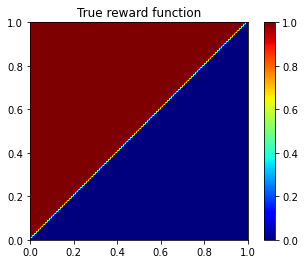

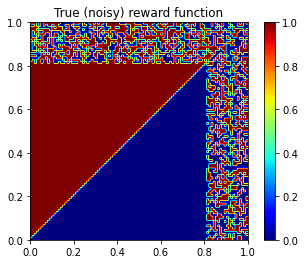

In [3]:
## Setup

iterations = 1

# Create comparison function
f = lambda x: x[0]
var_1, var_2 = 0.0, 10.0
reward_fn_true = lambda x : f(x)
seed = None
np.random.seed(seed)
noise_fn = lambda x: step_noise(x[0], x_step=0.8, var_1=var_1, var_2=var_2, seed=seed)
reward_fn_true_noisy = create_reward_fn_1(f, noise_fn, seed=seed)
comparison_fn = create_comparison_fn_1(f, noise_fn, seed=seed)

# Initialize random sampler
sample = lambda n: (None, [np.random.uniform(0, 1, size=(1,)) for _ in range(n)])

# Plot true reward function
vis_fn = lambda fn, title: visualize_fn_1(fn, title=title, x_range=[0,1], x_step=0.01)
vis_fn(reward_fn_true, title="True reward function")
vis_fn(reward_fn_true_noisy, title="True (noisy) reward function")

In [5]:
## Run feedback loop

comparisons_data = None
samples = {}
reward_fns = {}

for i in range(iterations):
    print(f"Iteration {i}", end=",")
    # Learn reward function from samples and feedback from comparison function
    reward_fn, comparisons_data = learn_reward(sample, comparison_fn, reward_cfg=reward_cfg, prev_comparisons=comparisons_data)
    
    # Train policy on reward function and return sampler
    sample = train_policy(reward_fn, policy_cfg=policy_cfg)

    # Store sampler and reward function
    samples[i] = sample
    reward_fns[i] = reward_fn

    # plot_sampler_1(samples[i], title=str(i), n=1000)
    # vis_fn(reward_fns[i], title=str(i))

Iteration 0,Learning with Cross Entropy
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Training process has finished.


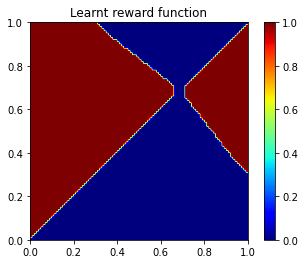

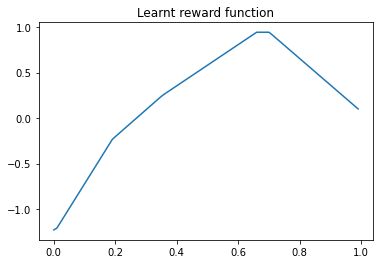

In [6]:
vis_fn(reward_fns[0], title="Learnt reward function")
plot_fn_1(reward_fns[0], title="Learnt reward function", x_range=[0,1], x_step=0.01)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

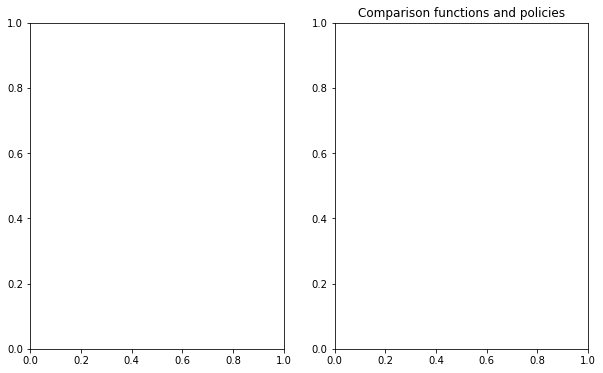

In [6]:
# Visualize results

visualize_res_1(reward_fns, samples, figsize=(10,6*iterations), save="1d_res", round=2)